# Zadatak 1
Učitati podatke iz MNIST skupa podataka i primeniti metode klasterovanja. Klasterovanje izvršiti po sadržaju same slike. Osmisliti način za vizualizaciju klastera.

In [1]:
import struct
import numpy as np

%matplotlib widget
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def load_labels(path):
    with open(path, "rb") as fp:
        struct.unpack(">I", fp.read(4))
        number_of_labels = struct.unpack(">I", fp.read(4))[0]
        labels = np.frombuffer(fp.read(number_of_labels), dtype=np.uint8)
        return labels

def load_images(path):
    with open(path, "rb") as fp:
        struct.unpack(">I", fp.read(4))
        number_of_images = struct.unpack(">I", fp.read(4))[0]
        rows = struct.unpack(">I", fp.read(4))[0]
        cols = struct.unpack(">I", fp.read(4))[0]
        images = np.frombuffer(fp.read(number_of_images*rows*cols), dtype=np.uint8).reshape((number_of_images, rows, cols))
        return images

In [2]:
mnist_train_labels = load_labels("train-labels.idx1-ubyte")
mnist_train_images = load_images("train-images.idx3-ubyte")

In [3]:
vektori = mnist_train_images.reshape(mnist_train_images.shape[0], mnist_train_images.shape[1]*mnist_train_images.shape[2])

In [4]:
from sklearn.cluster import KMeans

km = KMeans(10)
km.fit(vektori)

KMeans(n_clusters=10)

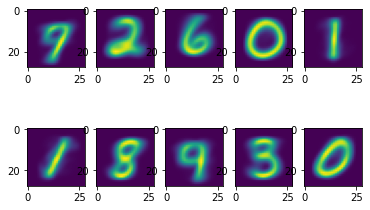

In [5]:
for i, c in enumerate(km.cluster_centers_):
    plt.subplot(2, 5, i+1)
    plt.imshow(c.reshape(28, 28))
plt.show()

# Zadatak 2
Napraviti algoritam za klasifikaciju podataka iz MNIST skupa podataka.

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsRestClassifier

klasifikator = OneVsRestClassifier(Perceptron())
klasifikator.fit(vektori, mnist_train_labels)

OneVsRestClassifier(estimator=Perceptron())

In [7]:
mnist_test_labels = load_labels("t10k-labels.idx1-ubyte")
mnist_test_images = load_images("t10k-images.idx3-ubyte")
mnist_test_images = mnist_test_images.reshape(mnist_test_images.shape[0], mnist_test_images.shape[1]*mnist_test_images.shape[2])
klasifikator.score(mnist_test_images, mnist_test_labels)

0.8394

# Zadatak 3
Nad MNIST skupom podataka primeniti KNN algoritam.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(vektori, mnist_train_labels)

KNeighborsClassifier(n_neighbors=3)

In [9]:
neigh.score(mnist_test_images, mnist_test_labels)

0.9705

# Zadatak 4
Obučiti SVM za klasifikaciju slika iz MNIST skupa podataka.

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(vektori, mnist_train_labels)

In [ ]:
clf.score(mnist_test_images, mnist_test_labels)

# Zadatak 5
Uporediti rezultate postignute različitim metodama klasifikacije.